1.Import the dataset and explore basic info (nulls, data types).

Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Uploading the dataset

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

basic info

In [3]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
df.head()

Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.Handle missing values

In [4]:
#for numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

#for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

#
df.isnull().sum()

/tmp/ipython-input-2736073624.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2736073624.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


3.Convert categorical features into numerical using encoding

In [5]:
#for categorical features
df_encoded = pd.get_dummies(df, drop_first=True)
print("Data after encoding:")
df_encoded.head()

Data after encoding:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


4.Normalize/standardize the numerical features

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

num_cols=df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_encoded[num_cols]=scaler.fit_transform(df_encoded[num_cols])

print("Data after standardization: ")
df_encoded.head()

Data after standardization: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,-1.730108,-0.789272,0.827377,-0.592481,0.432793,-0.473674,-0.502445,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-1.726220,1.266990,-1.566107,0.638789,0.432793,-0.473674,0.786845,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.722332,1.266990,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.718444,1.266990,-1.566107,0.407926,0.432793,-0.473674,0.420730,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-1.714556,-0.789272,0.827377,0.407926,-0.474545,-0.473674,-0.486337,False,False,False,...,False,False,False,False,False,False,False,False,False,True


5.Visualize outliers using boxplots and remove them

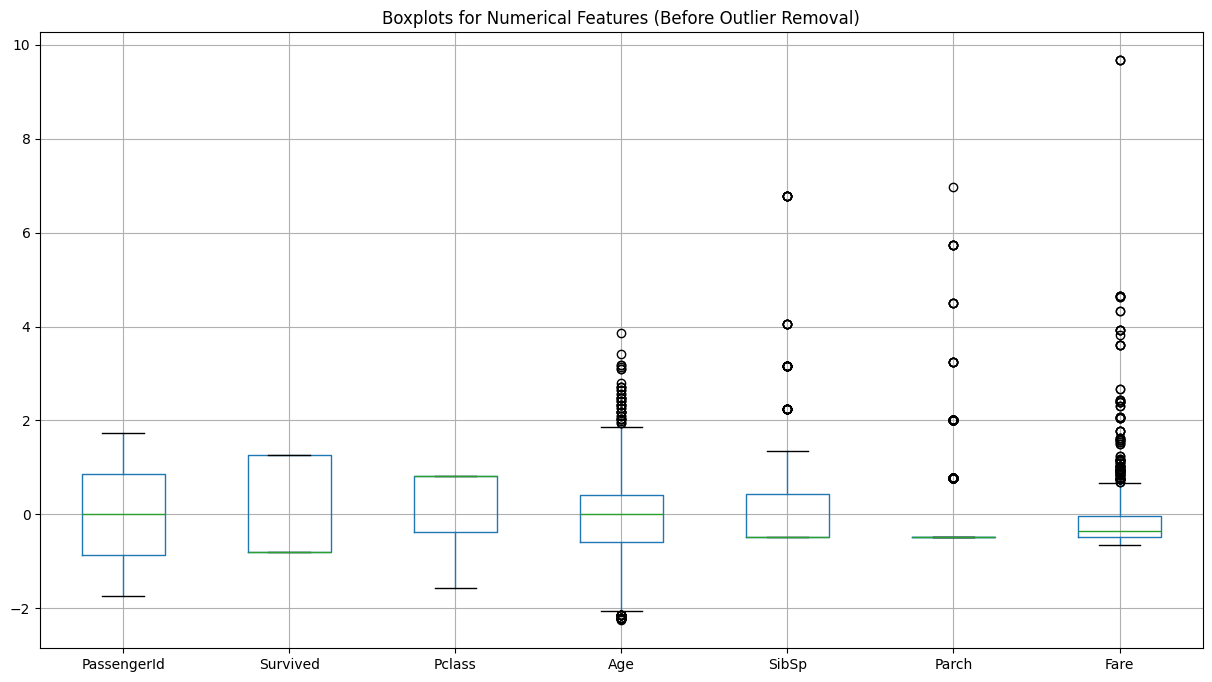

Shape before: (891, 1726)
Shape after removing outliers: (577, 1726)


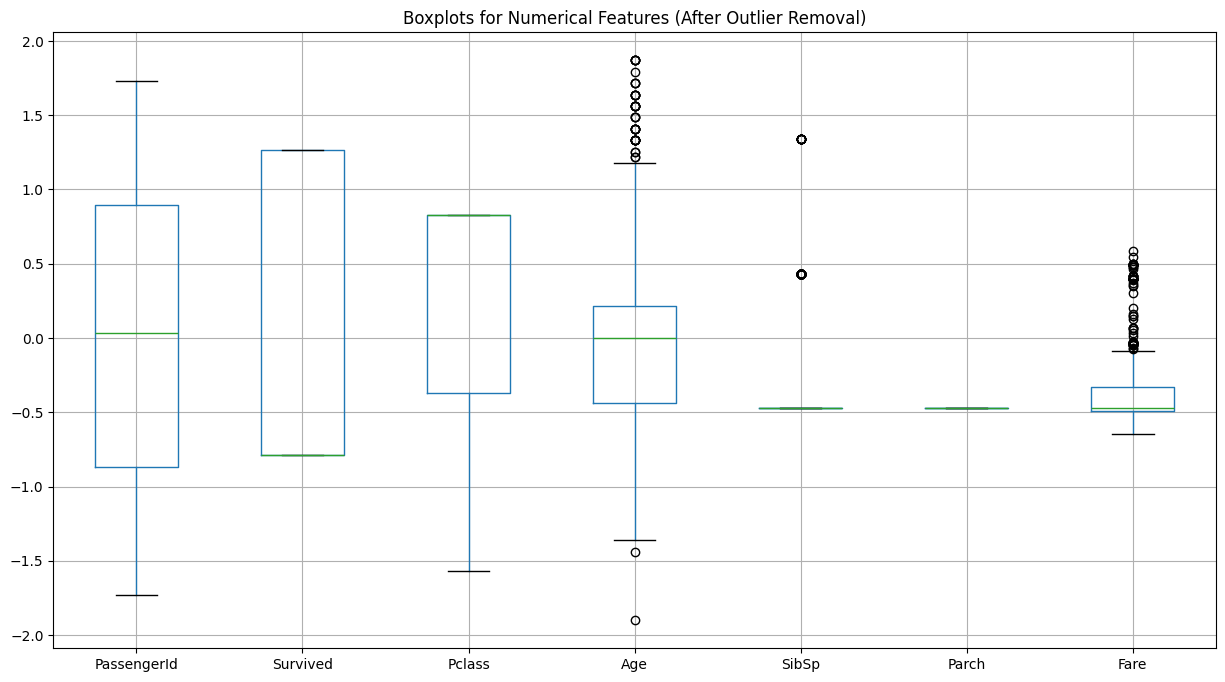

In [7]:
# Boxplots
plt.figure(figsize=(15, 8))
df_encoded[num_cols].boxplot()
plt.title("Boxplots for Numerical Features (Before Outlier Removal)")
plt.show()

# Remove outliers
Q1 = df_encoded[num_cols].quantile(0.25)
Q3 = df_encoded[num_cols].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_encoded[~((df_encoded[num_cols] < (Q1 - 1.5 * IQR)) | (df_encoded[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape before:", df_encoded.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

# Visualize again
plt.figure(figsize=(15, 8))
df_no_outliers[num_cols].boxplot()
plt.title("Boxplots for Numerical Features (After Outlier Removal)")
plt.show()
